# Data Augmentation

In [1]:
#!python -m pip install numpy
#!python -m pip install pandas
#!python -m pip install torch
#!python -m pip install matplotlib
#!python -m pip install sklearn
#!python -m pip install torchvision
#!python -m pip install tqdm
#!python -m pip install opencv-python
#!python -m pip install albumentations

import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib
import tqdm.auto as tqdm

import os
from PIL import Image
from sklearn.metrics import accuracy_score
import torchvision
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader

plt.style.use('seaborn')

import DiagnosisFunctions.tools as tools

import albumentations as A
from albumentations.augmentations.geometric.transforms import ElasticTransform
import torchvision.transforms.functional as TF

In [6]:
(trainpath, traintarget), _, _, le = tools.get_splits()
img_size = [200, 200]
train_transform = A.Compose(
    [
        ElasticTransform(alpha=1, sigma=50, alpha_affine=50, interpolation=1, border_mode=4, p=0.5),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.RGBShift(p=0.2),
    ]
)

trainset    = tools.DiagnosisDataset(path = trainpath, target = traintarget, size = img_size)#, transform = train_transform)
trainloader = DataLoader(trainset, batch_size=16)

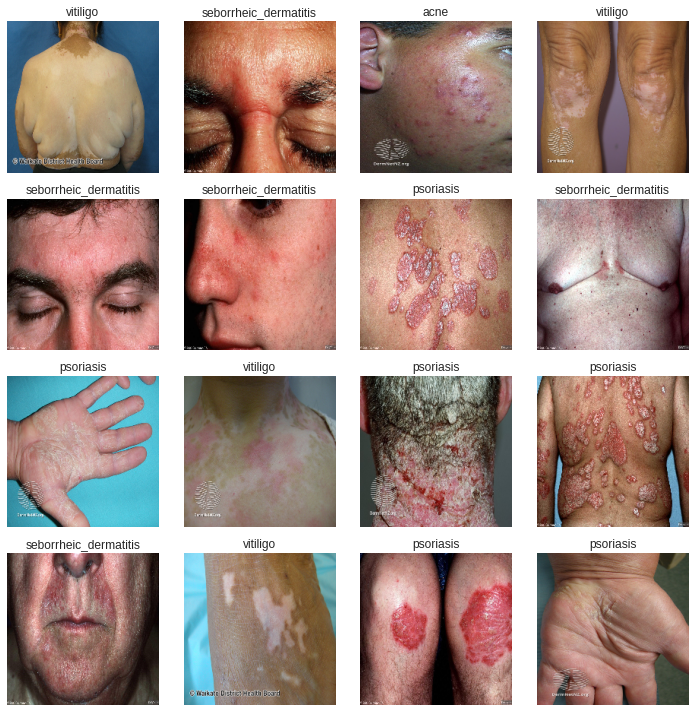

In [3]:
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize=(10,10))
axs = axs.flatten()

for k, ax in enumerate(axs):
    im, target = trainset.__getitem__(k)
    ax.imshow(im.permute(1,2,0))
    ax.axis('off')
    ax.set_title(le.inverse_transform([target])[0])

plt.tight_layout()

## Elastic Tranforms with grid lines

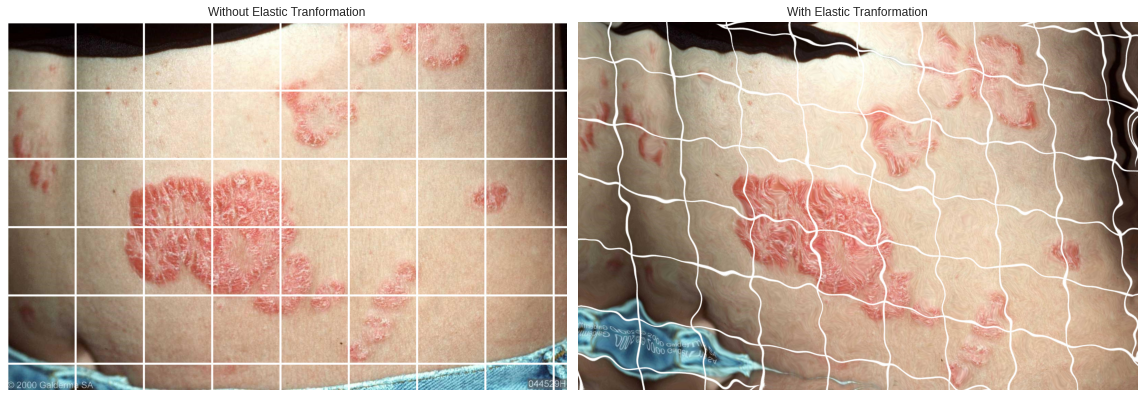

In [39]:
# Set elastic transform
grid_pic = ['./data/grid/044529HB.jpeg']

train_transform = A.Compose(
    [
        ElasticTransform(alpha=img_size[0]*5, sigma=img_size[0]*0.1, alpha_affine=img_size[0]*0.7, interpolation=1, border_mode=4, p=1)
    ]
)

trainset_before    = tools.DiagnosisDataset(path = grid_pic, target = traintarget)
trainloader_before = DataLoader(trainset, batch_size=16)

trainset_after   = tools.DiagnosisDataset(path = grid_pic, target = traintarget, transform = train_transform)
trainloader_after = DataLoader(trainset, batch_size=16)

# Plot
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(16,16))
axs = axs.flatten()

im_before, target_before = trainset_before.__getitem__(0)
axs[0].imshow(im_before.permute(1,2,0))
axs[0].axis('off')
axs[0].set_title('Without Elastic Tranformation')

im_after, target_after = trainset_after.__getitem__(0)
axs[1].imshow(im_after.permute(1,2,0))
axs[1].axis('off')
axs[1].set_title('With Elastic Tranformation')

plt.tight_layout()

## Train using loader

In [24]:
for data in trainloader:

    #Fetch images and targets from train loader.
    images, targets = data
    print(len(images))
    print(len(targets))

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = cnn(images)

    loss = criterion(outputs, torch.FloatTensor(targets))
    loss.backward()
    optimizer.step()

    #Add the batch loss
    train_loss += loss.item()

    #Save predictions and targets
    predictions  += outputs.tolist()
    ground_truth += targets.tolist()
    break

16
16


NameError: name 'optimizer' is not defined